<a href="https://colab.research.google.com/github/201815054/PythonStudy2/blob/master/reuter_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, Embedding ,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [ ]:
(x_train,y_train),(x_test,y_test) = reuters.load_data(num_words=1000,test_split=0.2) #단어를 1000개를 가져왔기때문에 

In [ ]:
print(x_train.shape, x_test.shape)

(8982,) (2246,)


In [ ]:
x_train[:3] #단어를 1000개를 가져왔기때문에 아마 0부터 999까지있을겨 리스트 하나하나가기사임


array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 2, 699, 2, 2, 56, 2, 2, 9, 56, 2, 2, 81, 5, 2, 57, 366, 737, 132, 20, 2, 7, 2, 49, 2, 2, 2, 2, 699, 2, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2, 2, 2, 775, 7, 48, 34, 191, 44, 35, 2, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 2, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 2, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90, 67, 2, 55, 2, 92, 617, 80, 2, 46, 905, 220, 13,

In [ ]:
y_train[:10] #뉴스기산데 카테고리 뜻하는거임.. 산업, 정치, 경제 등 이런거 ..
# 첫번째 기사가 몇번째 카테고리의 기산지를 나타냄. .

array([ 3,  4,  3,  4,  4,  4,  4,  3,  3, 16])

In [ ]:
np.max(y_train)+1 # 46개의 뉴스 카테고리 

46

In [ ]:
length = [len(line) for line in x_train] # 어떤건 길이가 29고 어떤건 899길이가되는것도있구 ->기사의 단어길이

In [ ]:
np.mean([len(line) for line in x_train]) #길이의 평균값이 너무 작아서 200정도로 맞춰준다 ! 

145.5398574927633

(array([9.680e+02, 1.324e+03, 1.435e+03, 1.482e+03, 7.290e+02, 3.690e+02,
        4.230e+02, 4.010e+02, 2.960e+02, 1.920e+02, 1.730e+02, 1.680e+02,
        1.660e+02, 8.200e+01, 8.800e+01, 7.600e+01, 6.300e+01, 5.300e+01,
        5.300e+01, 6.500e+01, 3.700e+01, 3.900e+01, 3.300e+01, 2.600e+01,
        3.500e+01, 2.900e+01, 3.000e+01, 1.300e+01, 2.300e+01, 2.400e+01,
        1.400e+01, 1.400e+01, 1.200e+01, 1.300e+01, 7.000e+00, 8.000e+00,
        5.000e+00, 5.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

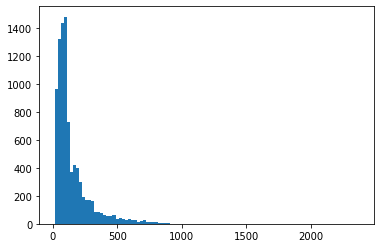

In [ ]:
plt.hist(length,bins=100)

In [ ]:
x_train_seq = pad_sequences(x_train,maxlen=200)
x_test_seq = pad_sequences(x_test,maxlen=200) #길이의 평균값이 너무 작아서 200정도로 맞춰준다 ! 

In [ ]:
y_train # 클래스로 되어있기때문에 원핫으로 바꿔주깅 
to_categorical(y_train).shape #쉐입을보면 카테고리종류가 46이었기때무에 컬럼이 46개가있고 자기에해당되는값만1

(8982, 46)

In [ ]:
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)

In [ ]:
x_train_seq[:2] # 단어가 숫자로되어있음 크기로 인식하기때문에 원핫방식으로 바꿔야된다했는데..
# 원핫으로 바꾸면 크기가 너무 커지기때문에 딥러닝을 통해 특정한 벡터로 바꿔줌 => Embedding

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   2,   2,   8,
         43,  10, 447,   5,  25, 207, 270,   5,   2, 111,  16, 369, 186,
         90,  67,   7,  89,   5,  19, 102,   6,  19, 124,  15,  90,  67,
         84,  22, 482,  26,   7,  48,   4,  49,   8, 864,  39, 209, 154,
          6, 151,   6,  83,  11,  15,  22, 155,  11,  15,   7,  48,   9,
          2,   2, 504,   6, 258,   6, 272,  11,  15

In [ ]:
model = Sequential()
model.add(Embedding(1000,30)) # 천개의 단어가있는데 30개의
model.add(LSTM(100)) # 100차원의 모델을 만들거임 내부적으로 하이퍼볼릭탄젠트로 처리함.. 
model.add(Dense(46,activation='softmax')) #46개값중 1개의 값을 맞추는거기때문에
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 30)          30000     
                                                                 
 lstm (LSTM)                 (None, 100)               52400     
                                                                 
 dense (Dense)               (None, 46)                4646      
                                                                 
Total params: 87,046
Trainable params: 87,046
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam') #loss는 멀티클래시피케이션이니까 categorical로 줌 

In [ ]:
hist = model.fit(x_train_seq.astype(float), y_train_oh, epochs=100, batch_size=20, validation_data=(x_test_seq.astype(float),y_test_oh))

In [ ]:
model = Sequential()
model.add(Embedding(1000,30)) # 천개의 단어가있는데 30개의
model.add(Dropout(0.5))
model.add(Conv1D(64,5,padding='valid',activation='relu',strides=1)) #conv1d는 한쪽방향으로 슬라이딩하는것 ..(1 demensional convolution)
# 이걸하면 더 좋아진다 이건아님 근데 걍 더 깊게 쌓을수있다는거
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(100),return_sequences=True)
model.add(LSTM(100)) # 100차원의 모델을 만들거임 내부적으로 하이퍼볼릭탄젠트로 처리함.. 
model.add(Dense100,activation='relu')
mode.add(Dropout(0.5))
model.add(Dense(46,activation='softmax')) #46개값중 1개의 값을 맞추는거기때문에
model.summary()

NameError: ignored

In [ ]:
# print(x_train_seq.shape, x_test_seq.shape)

In [ ]:
# model = Sequential()
# model.add(SimpleRNN(8,input_shape=(150,1))) # 이거무슨뜻.. ? 
# model.add(Dense(1,activation='sigmoid'))
# model.summary()

In [ ]:
# x_train_seq

In [ ]:
# x_train.shape

In [ ]:
# model.compile(loss='binary_crossentropy', metrics=['accuracy'],optimizer='adam')

In [ ]:
# hist = model.fit(x_train_seq.astype(float),y_train, epochs=10, batch_size=64, validation_data=(x_test_seq.astype(float),y_test))